In [1]:
# importing  nltk library for tokenization, stemming, tagging, parsing, and more
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
#importing more libraries for visualization and machine learning model:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset. To avoid utf-8 unicode decode error we use ISO-8859-1 encoding.
df=pd.read_csv(r'D:/floor assembly/Hamza data/B pillar/Oasis data/Email spam Prediction/spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df=df.dropna(axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
#renaming the column name to Label and Message:

df.rename(columns={'v1': 'Label'}, inplace=True)
df.rename(columns={'v2': 'Message'}, inplace=True)

In [11]:
df

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
print('Labeled emails:', df['Label'].value_counts())       #counting number of soam and non-spam messages:

Labeled emails: Label
ham     4825
spam     747
Name: count, dtype: int64


In [13]:
df['Label']=df['Label'].apply(lambda x:0 if x=='ham' else 1)     #converting the labels into Binary numbers:

In [14]:
print('percentage of non-spam emails: \n', round(len(df[df['Label'] == 0]) / len(df['Label']) * 100), "%")
print('percentage of non-spam emails: \n', round(len(df[df['Label'] == 1]) / len(df['Label']) * 100), "%")

percentage of non-spam emails: 
 87 %
percentage of non-spam emails: 
 13 %


In [15]:
df['Length']=df['Message'].str.len()

In [16]:
df['Message']=df['Message'].str.lower()

In [17]:
df.head()

,Label,Message,Length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [18]:
#replacing emailaddress with 'email':
df['Message']=df['Message'].str.replace(r'^.+@[^\.].*\[a-z]{2,}$','email address')
#replacing URL with 'websites':
df['Message']=df['Message'].str.replace(r'^http\://[a-zA-z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
#replacing currency symbols with money symbol:
df['Message']=df['Message'].str.replace(r'€|\$','Dollar')
#Replacing 10 digit phone number:
df['Message']=df['Message'].str.replace( r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#Replacing numeric chards with 'numbers'
df['Message']=df['Message'].str.replace( r'\d+(\.\d+)?','numbers')

In [19]:
#Removing Punctuations:
df['Message'] = df['Message'].str.replace(r'[^\w\d\s]', ' ')
#Replacing Whitespaces with single space:
df['Message']=df['Message'].str.replace( r'\s+',' ')
#Removing leading and trailing spaces:
df['Message']=df['Message'].str.replace( r'^\s+|\s+?$','')

In [20]:
df.head()

,Label,Message,Length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [21]:
#removing stopwords:
import string
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english')+['u','ü','ur','4','2','im','dont','doin','ure'])
df['Message']=df['Message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [22]:
#new column( clean_length) after removing all the unneccessary words:
df['Clean_Length']=df['Message'].str.len()

In [23]:
df.head()

,Label,Message,Length,Clean_Length
0,0,"go jurong point, crazy.. available bugis n gre...",111,91
1,0,ok lar... joking wif oni...,29,27
2,1,free entry wkly comp win fa cup final tkts 21s...,155,139
3,0,dun say early hor... c already say...,49,37
4,0,"nah think goes usf, lives around though",61,39


In [24]:
print('Original Length',df['Length'].sum())
print('Clean Length',df['Clean_Length'].sum())
print('Total words removed',df['Length'].sum() - df['Clean_Length'].sum() )        #checking total number of words remove from message:

Original Length 446422
Clean Length 324305
Total words removed 122117


Text(0.5, 1.0, "Number of Labels('0','1') in dataset")

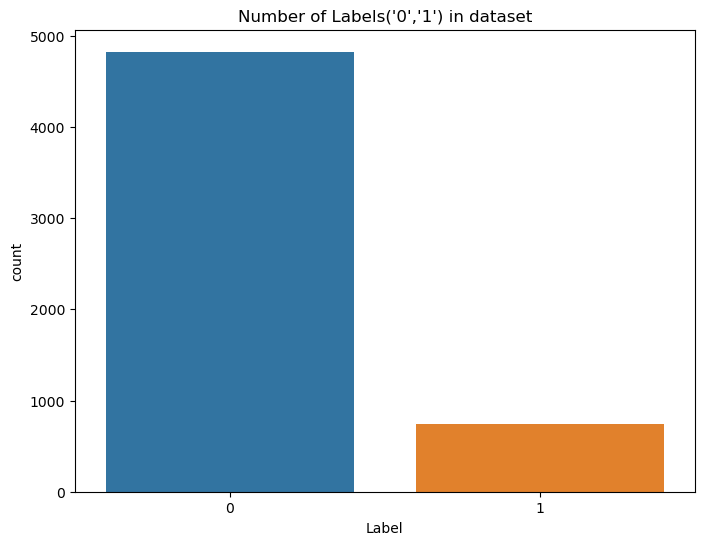

In [25]:
#making visuals for number of labels:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Label')
plt.title("Number of Labels('0','1') in dataset")

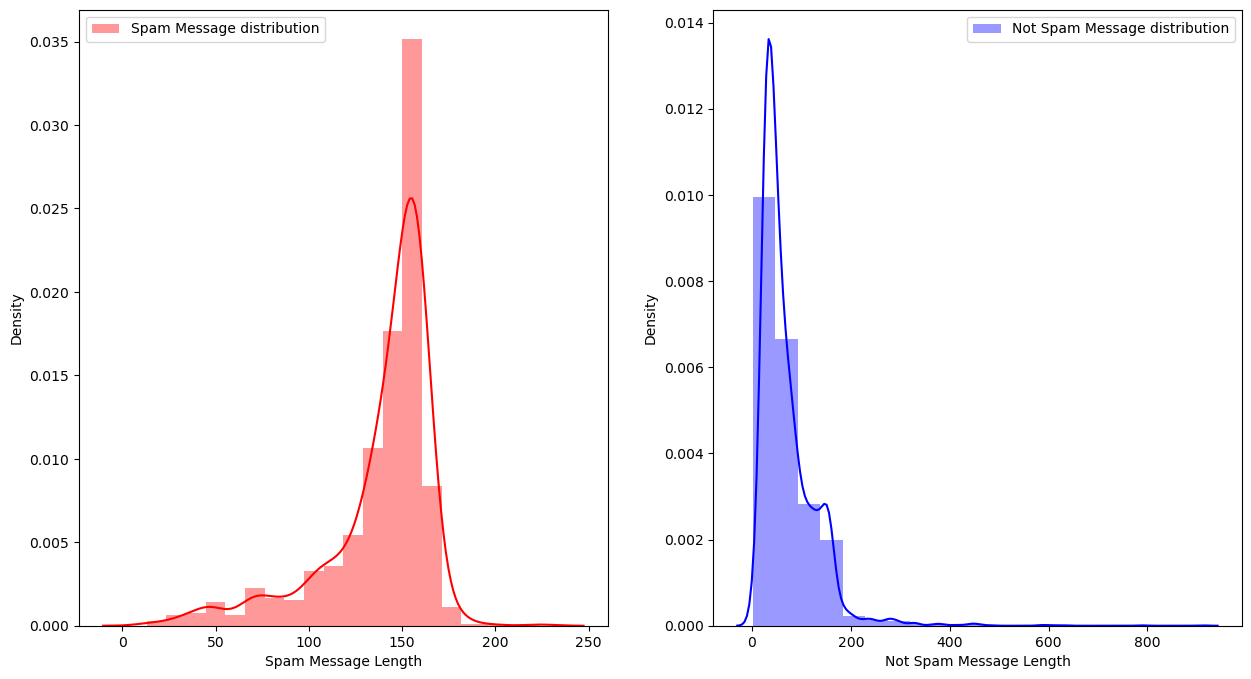

In [26]:
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Label']==1]['Length'],bins=20,ax=ax[0],label='Spam Message distribution',color='r')
ax[0].set_xlabel('Spam Message Length')
ax[0].legend()

sns.distplot(df[df['Label']==0]['Length'],bins=20,ax=ax[1],label='Not Spam Message distribution',color='b')
ax[1].set_xlabel('Not Spam Message Length')
ax[1].legend()

Checking the visuals before cleaning the data.

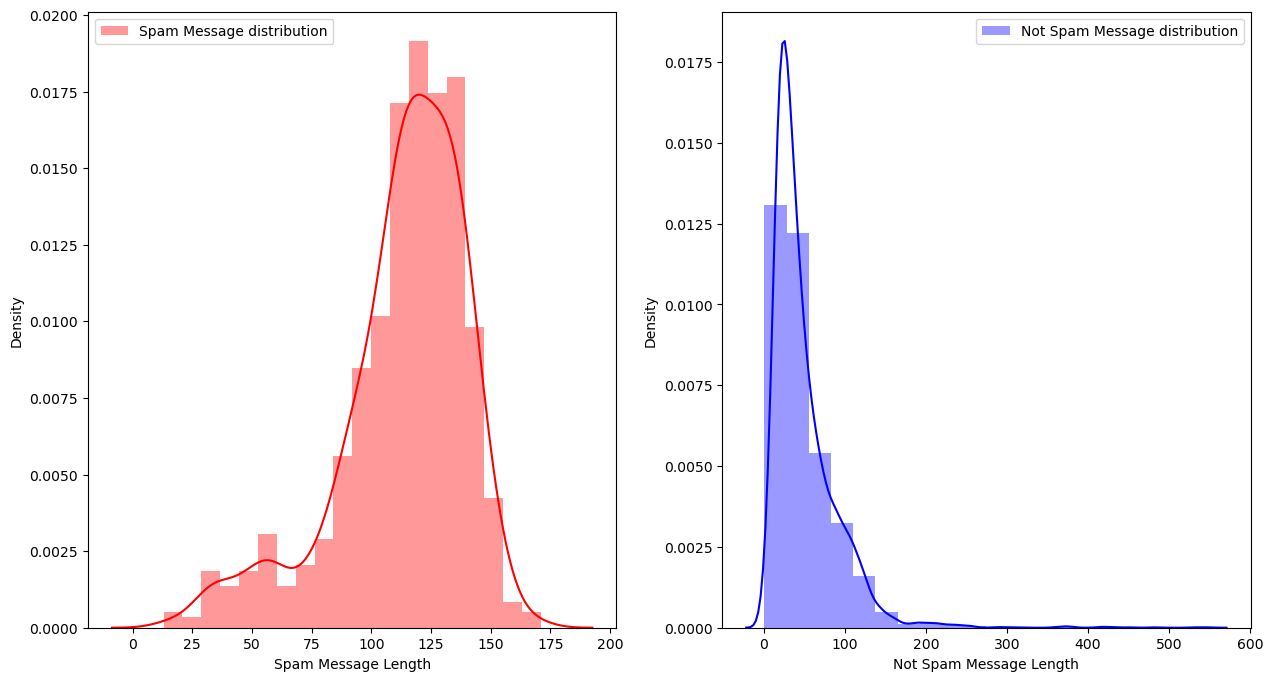

In [27]:
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Label']==1]['Clean_Length'],bins=20,ax=ax[0],label='Spam Message distribution',color='r')
ax[0].set_xlabel('Spam Message Length')
ax[0].legend()

sns.distplot(df[df['Label']==0]['Clean_Length'],bins=20,ax=ax[1],label='Not Spam Message distribution',color='b')
ax[1].set_xlabel('Not Spam Message Length')
ax[1].legend()

Checking the visuals After cleaning the data.

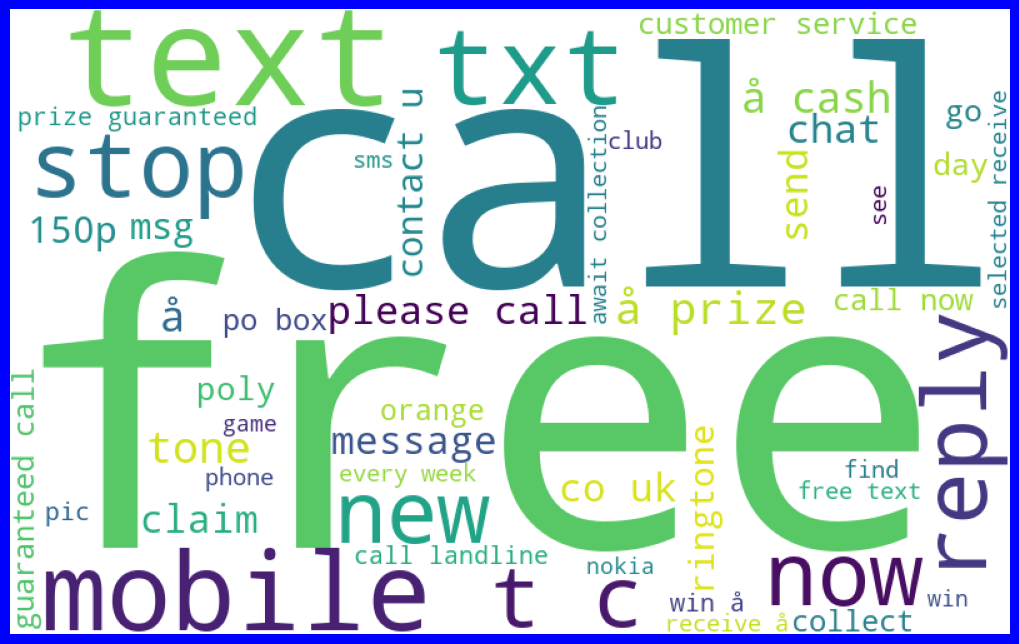

In [36]:
#Creating a visula or wordcloudshowing most important and frequent words in Spam message:

from wordcloud import WordCloud
spams=df['Message'][df['Label']==1]

Spam_cloud=WordCloud(width=800, height=500, background_color='white',max_words=50).generate(''.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(Spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

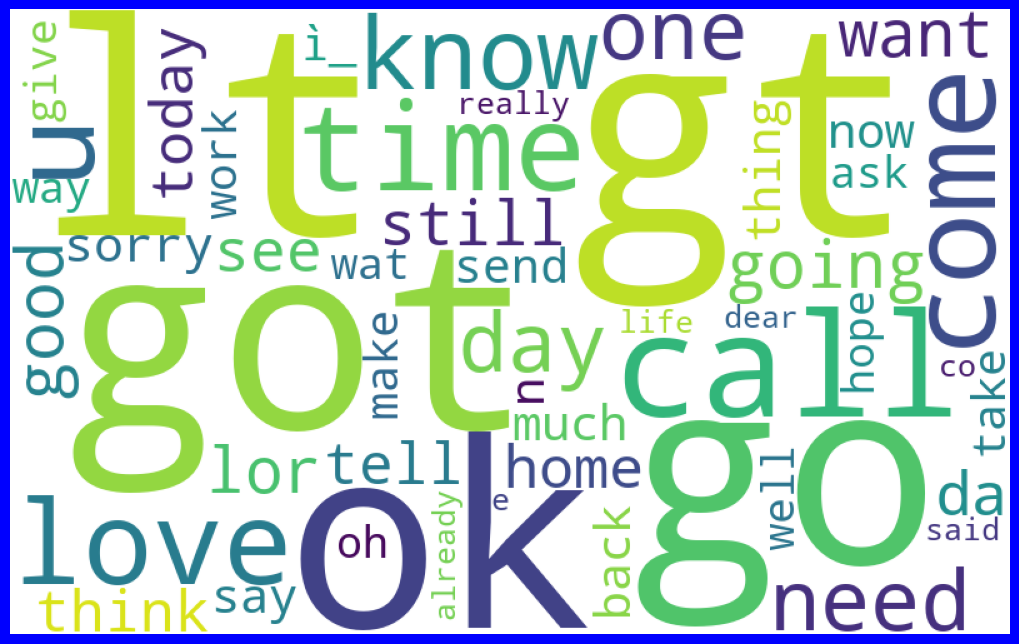

In [37]:
#Creating a visula or wordcloudshowing most important and frequent words in Non-Spam message:


spams=df['Message'][df['Label']==0]

Non_spam_cloud=WordCloud(width=800, height=500, background_color='white',max_words=50).generate(''.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(Non_spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Converting Text into Vectors:

In [30]:
#converting text into vectors
#instantiate MultinomialNB classifier
#Split feature and Label


tf_vec=TfidfVectorizer()

#naive = MultinomialNB

SVM=SVC(C=1.0,kernel='linear',degree=3, gamma = 'auto')

feature=tf_vec.fit_transform(df['Message'])

X=feature
y=df['Label']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
SVM.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [33]:
y_pred=SVM.predict(X_test)

In [34]:
# Checking the results of accuracy and precision of the predicted value using validation algorithms:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [35]:
# Print the results:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

Accuracy: 0.9802631578947368
Confusion Matrix:
[[1450    3]
 [  30  189]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.86      0.92       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672

